# “Proyecto 2 – Modelos de clasificación supervisada para evaluar la calidad de un automovil”

                                     VALERIE FAJARDO VFAJARD45354 HECTOR BELLO HBELLOS52070 HAROLD MENDOZA HMENDOZ25900
                                                                   MACHINE LEARNING I

## Explicación del Problema:
En este análisis, el conjunto de datos de evaluación de automóviles es un recurso valioso para la investigación en aprendizaje automático, específicamente en tareas de clasificación. Fue creado a partir de un modelo de decisión jerárquico simple y se ha utilizado extensamente para probar algoritmos de inducción constructiva y descubrimiento de estructuras.
El problema principal que se puede abordar con este conjunto de datos es predecir la aceptabilidad de un automóvil basándose en sus características. En otras palabras, dado un nuevo automóvil con valores conocidos para los seis atributos, se busca determinar si el automóvil es inaceptable, aceptable, bueno o muy bueno.
Este conjunto de datos de evaluación de automóviles ofrece una oportunidad excelente para aplicar técnicas de aprendizaje automático y desarrollar modelos predictivos.Lo convierten en un punto de partida ideal para nosotros que deseamos aprender sobre clasificación y análisis de datos.
Unas caracterisiticas de este modelo 
Derivado de un modelo de decisión jerárquico. Evaluar la aceptabilidad general de un automóvi es su objetivol.• Seis atributos categóricos que describen diferentes características del vehículo; prieco de compra, mantenimiento, número de puertas, capacidad, tamaño del maletero, seguridad CLASES.  La variable objetivclasee" identifica el nivel de evaluación del automóvil -inaceptable, aceptable, bueno, muy bueno- Tamaño.s.

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,SGDRegressor, SGDClassifier
import requests
from bs4 import BeautifulSoup
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



In [5]:
###C:\Users\harol\Downloads\car+evaluation
# Cargar el archivo .data
data_path = "C:\\Users\\dihwz773\\Ciencia de Datos\\Machine learning\\Caso 2 Analisis carro\\car.data"
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv(data_path, header=None, names=column_names)

# Mostrar los primeros registros y la información general
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


(  buying  maint doors persons lug_boot safety  class
 0  vhigh  vhigh     2       2    small    low  unacc
 1  vhigh  vhigh     2       2    small    med  unacc
 2  vhigh  vhigh     2       2    small   high  unacc
 3  vhigh  vhigh     2       2      med    low  unacc
 4  vhigh  vhigh     2       2      med    med  unacc,
 None)

In [37]:
print(df.describe(),'\n')
print(df)

       buying  maint doors persons lug_boot safety  class
count    1728   1728  1728    1728     1728   1728   1728
unique      4      4     4       3        3      3      4
top     vhigh  vhigh     2       2    small    low  unacc
freq      432    432   432     576      576    576   1210 

     buying  maint  doors persons lug_boot safety  class
0     vhigh  vhigh      2       2    small    low  unacc
1     vhigh  vhigh      2       2    small    med  unacc
2     vhigh  vhigh      2       2    small   high  unacc
3     vhigh  vhigh      2       2      med    low  unacc
4     vhigh  vhigh      2       2      med    med  unacc
...     ...    ...    ...     ...      ...    ...    ...
1723    low    low  5more    more      med    med   good
1724    low    low  5more    more      med   high  vgood
1725    low    low  5more    more      big    low  unacc
1726    low    low  5more    more      big    med   good
1727    low    low  5more    more      big   high  vgood

[1728 rows x 7 columns]


* A continuaion describiremos que informacion contiene cada una de las variables del DataFrame


In [8]:
url = "https://archive.ics.uci.edu/dataset/19/car+evaluation"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
table = soup.find('table')  # Busca la primera tabla en la página
headers = []

# Organiza los titulos
for th in table.find_all('th'):
    headers.append(th.text.strip())
#Organiza la informacion de la tabla
data = []
for tr in table.find_all('tr'):
    row = [td.text.strip() for td in tr.find_all('td')]
    data.append(row)
# estructura un dataframe con la tabla
df_sign = pd.DataFrame(data, columns=headers)

#Elimina columnas que no nos sirven en el dataframe
df_sign = df_sign.drop(['Role','Type','Units','Missing Values'], axis =1).drop(index = 0 , axis =0)
print(f"{df_sign} \n")

  Variable Name                                        Description
1        buying                                       buying price
2         maint                           price of the maintenance
3         doors                                    number of doors
4       persons              capacity in terms of persons to carry
5      lug_boot                           the size of luggage boot
6        safety                        estimated safety of the car
7         class  evaulation level (unacceptable, acceptable, go... 



###  7. Ahora en una celda de código cargue la base car.data determine la cantidad de variables y registros, indique cuales son numéricas y cualitativas y haga un resumen de esa información.

In [10]:
# Determinar cuáles variables son cualitativas
qualitative_vars = df.select_dtypes(include='object').columns.tolist()
print(f"Variables cualitativas: {qualitative_vars}")

# Resumen de información para variables cualitativas
summary = df.describe(include='object')
summary


Variables cualitativas: ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


tambien es interesante la evaluacion de histogramas de las variables.


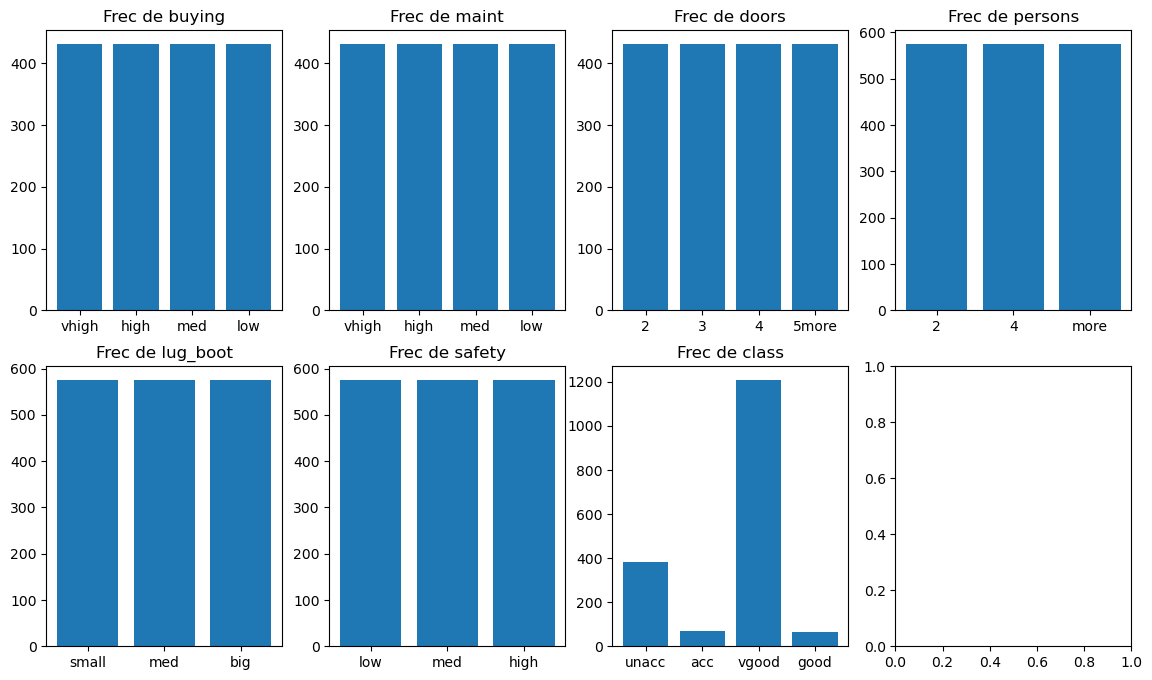

In [12]:
# Crear el diagrama de barras
fig, asx = plt.subplots(2,4, figsize =(14,8))
i = 0
j = 0
for colum in df:
    if j == 4:
        j=0
        i=1
    
    asx[i,j].bar(df[colum].unique(), df.groupby(colum).size())
    asx[i,j].set_title(f'Frec de {colum}') 
    j = j+1
plt.show()


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encod = pd.DataFrame()
for col in df:
    df_encod[col] = le.fit_transform(df[col])
print(df_encod)

      buying  maint  doors  persons  lug_boot  safety  class
0          3      3      0        0         2       1      2
1          3      3      0        0         2       2      2
2          3      3      0        0         2       0      2
3          3      3      0        0         1       1      2
4          3      3      0        0         1       2      2
...      ...    ...    ...      ...       ...     ...    ...
1723       1      1      3        2         1       2      1
1724       1      1      3        2         1       0      3
1725       1      1      3        2         0       1      2
1726       1      1      3        2         0       2      1
1727       1      1      3        2         0       0      3

[1728 rows x 7 columns]


###  8. La variable class es la variable objetivo, haga una partición adecuada de la base para determinar entrenamiento y testeo.

In [15]:
from sklearn.model_selection import train_test_split
# Separar variables predictoras de la variable objetivo
X = df_encod.drop('class', axis=1)
y = df_encod['class']
# Realizar la partición de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
(X_train.shape, X_test.shape), (y_train.shape, y_test.shape)

(((1209, 6), (519, 6)), ((1209,), (519,)))

###  9. Aplique varios modelos de aprendizaje y determine los reportes de clasificación del paquete scikit-learn.

In [17]:
from sklearn.preprocessing import OrdinalEncoder
# Codificación de variables categóricas para modelos de aprendizaje
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)
X_train_encoded[:5], X_test_encoded[:5] # Verificar las primeras filas codificadas
    

(array([[2., 2., 3., 1., 0., 0.],
        [0., 0., 1., 2., 2., 1.],
        [1., 2., 1., 1., 1., 2.],
        [2., 2., 3., 0., 0., 0.],
        [2., 0., 2., 0., 0., 2.]]),
 array([[0., 0., 2., 0., 1., 0.],
        [2., 1., 0., 1., 1., 2.],
        [0., 0., 3., 0., 0., 2.],
        [1., 0., 3., 1., 1., 2.],
        [2., 1., 2., 2., 1., 1.]]))

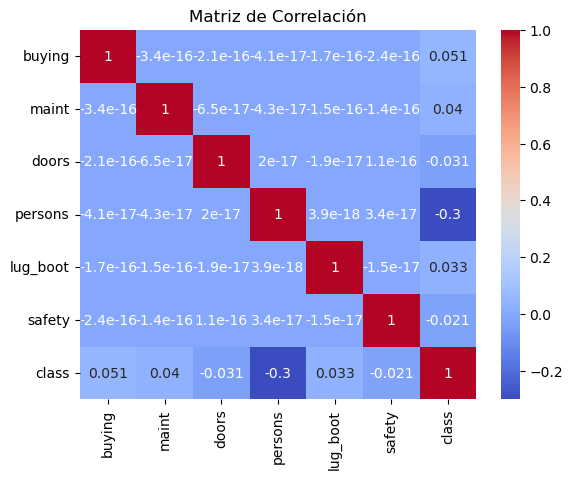

In [18]:
# Análisis de correlación
corr_matrix = df_encod.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

### Conclusion
A través de la matriz de correlacion podemos ver que las variables no tienen alguna relación entre ellas, mostrado esto en el grafico con coeficientes muy cercana a 0, al confrontar con la variable objetivo (class) empezamos a ver alguna relación pero en un nivel muy bajo lo cual nos indica que estas variables son independientes y no correlacionados por lo que pueden ser utiles para contruir el modelo.

In [29]:

# Definir modelos a entrenar
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Entrenar y evaluar cada modelo
reports = {}
for name, model in models.items():
    model.fit(X_train_encoded, y_train)
    y_pred = model.predict(X_test_encoded)
    report = classification_report(y_test, y_pred, output_dict=True)
    reports[name] = report
    print(f"Reporte de clasificación para {name}:")
    print(classification_report(y_test, y_pred))
    print(f"Confusion Matrix {name}:")
    print(confusion_matrix(y_test, y_pred),"\n")

C:\Users\dihwz773\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dihwz773\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dihwz773\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

Reporte de clasificación para Logistic Regression:
              precision    recall  f1-score   support

           0       0.30      0.18      0.22       118
           1       0.00      0.00      0.00        19
           2       0.73      0.90      0.81       358
           3       0.14      0.04      0.06        24

    accuracy                           0.66       519
   macro avg       0.29      0.28      0.27       519
weighted avg       0.58      0.66      0.61       519

Confusion Matrix Logistic Regression:
[[ 21   0  92   5]
 [  3   0  16   0]
 [ 34   0 323   1]
 [ 12   0  11   1]] 

Reporte de clasificación para Decision Tree:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       118
           1       0.71      0.89      0.79        19
           2       0.99      0.98      0.99       358
           3       0.90      0.79      0.84        24

    accuracy                           0.96       519
   macro avg       0.88   

In [31]:
import pandas as pd

# Crear un DataFrame resumen de los reportes de clasificación
summary_df = pd.DataFrame({model: {'precision': report['weighted avg']['precision'],
                                   'recall': report['weighted avg']['recall'],
                                   'f1-score': report['weighted avg']['f1-score']}
                           for model, report in reports.items()})
summary_df

,Logistic Regression,Decision Tree,Random Forest
precision,0.578890,0.962075,0.965293
recall,0.664740,0.959538,0.963391
f1-score,0.610781,0.960199,0.964051


## Conclusion

Podríamos pensar que un análisis de frecuencias para encontrar la probabilidad de que un evento pueda ocurrir o no, como en el caso de la clasificacion de los vehículos, partiendo de sus cualidades como el numero de pasajeros que transporta, el tamaño del maletero o el costo de mantenimiento del mismo podria servir muy bien para clasificacion su nivel de aceptabilidad, pero encontramos que existen otros 2 modelos que funcionan de una mejor manera como el árbol de decisión en el cual crea diferentes escenarios de las variables independientes como si el tamaño del baúl es grande, con capacidad de 3 pasajeros y un alto costos de los mantenimientos es considerado un auto aceptable, aún mejor encontramos que el modelo de bosque aleatorio el cual logra el mismo analisis anterior pero un numero de veces de manera simultanea, para luego promediar los resultados y asi evitar sobreajustes del modelo y encontrar Una mejor predicción de los datos. Muestra de esto esta en los altos porcentajes de precisión que encontramos en el modelo.

Por último al comparado los valores de recall econtramos que el modelo de árbol en la variable Muy bueno (3 en la codificacion) tiene un mejor indicador que en el modelo de bosque aleatorio lo que nos podria llevar a pensar que el primer modelo es mejor, pero sí promediaramos los indicadores de todas las variables de salida encontraríamos que realmente en el arbol aleatorio existe una mayor precisión global para la categorías qué necesitamos predecir.

## Mejorando el modelo

In [22]:

# Entrenar el modelo mejorado de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_encoded, y_train)

# Predicciones y evaluación
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Precisión del modelo de Random Forest: {accuracy:.2f}")
print("Reporte de Clasificación:")
print(classification_rep)

Precisión del modelo de Random Forest: 0.97
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       118
           1       0.71      0.89      0.79        19
           2       1.00      0.99      0.99       358
           3       0.95      0.88      0.91        24

    accuracy                           0.97       519
   macro avg       0.90      0.92      0.91       519
weighted avg       0.97      0.97      0.97       519



C:\Users\dihwz773\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


## Conclusion

Cómo visualizamos en la parte comparativa de los modelos, encotramos que el random forest es uno de los modelo con los mas altos imdicadores de aceptabilidad a la hora de categorizar los vehiculos, por lo que realizamos una nueva evaluación del modelo incrementando el número de árboles dentro del mismo, para evaluar la posibilidad de mejorar los indicadores, cambiamos esta variable a 100 estimaciones y encontramos una leve mejora de modelo, lo cual es aceptable partiendo de hecho que el modelo ya arrojaba buenos resultados. Pero esto nos ayuda a entender como mejorar un modelo cuando requerimos una mejor prediccion.

## Conclusiones del Análisis de Calidad de Automóviles

Objetivo del Modelo: Se busca predecir la aceptabilidad de un automóvil basado en seis atributos categóricos como precio de compra, costo de mantenimiento, número de puertas, capacidad de personas, tamaño del maletero, y nivel de seguridad. Estos factores permiten categorizar los automóviles en niveles de calidad.

Análisis Exploratorio: La visualización de datos reveló patrones claros en la distribución de cada categoría de atributo, mostrando que ciertos valores de atributos como la seguridad y el tamaño del maletero podrían tener una correlación significativa con la aceptabilidad del automóvil.

Analisis del Modelo Usado: A través del análisis de este problema encontramos que es muy importante conocer el concepto de cada uno de los modelos y su forma de trabajo, de esa manera podríamos conectar el tipo de problema con el modelo que podríamos usar para este.
Inicialmente nuestra percepción nos hizo pensar que a través de las probabilidades de las características en un vehículo podrían determinar fácilmente qué tipo de la clasificación tiene el vehículo, pero al correr el modelo no nos arrojó los mejores resultados, por otro lado los modelos de clasificación  como el modelo de árbol y el modelo de bosque aleatorio crean escenarios en donde la combinación de las variables permiten la clasificación del vehículo lo cual funciono mejor para este tipo de problema y obtuvimos unos mejores resultados. 
También es importante conocer cómo mejorar cada uno de los modelos en caso de que las métricas no arrojen los niveles esperados de precisión.

Los resultados están por encima del 95% lo cual nos pareció un buen nivel de predicción y que aún se puede seguir mejorando como vimos en alguna parte del análisis.

Interpretación de Resultados: Los resultados de la clasificación mostraron diferencias en la precisión para cada categoría de aceptabilidad del automóvil, lo cual sugiere que algunos atributos impactan más en la predicción de la aceptabilidad que otros.
